Referencias:

https://towardsdatascience.com/master-the-coco-dataset-for-semantic-image-segmentation-part-1-of-2-732712631047



Main Script

4 Clases

# Data Loading and Checking

In [1]:
import torch
import torchvision
import torch.utils.data as data
import torchvision.utils as utils
import torch.nn as nn
import torch.nn.functional as F
import skimage.io as io
from torch.utils.data import Dataset, DataLoader
from torchvision import io, transforms
import torchvision.transforms.functional as TF
from tqdm.auto import tqdm
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision import models
import os
import numpy as np
from PIL import Image, ImageOps, ImageFilter
from pathlib import Path
import random
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import pycocotools
import json


import matplotlib.pyplot as plt
%matplotlib inline





e:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\localrun\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local")

## ANNOTATION FILE PARAMETERS

In [3]:
ann_File_train = r"Base de Datos\train\annotations\train_data1024.json"
coco_file_train = COCO(ann_File_train)
ann_File_test = r"Base de Datos\test\annotations\test_data1024.json"
coco_file_test = COCO(ann_File_test)

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!
loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [4]:
ann_File_train

'Base de Datos\\train\\annotations\\train_data1024.json'

In [5]:
dataset_view_train = coco_file_train.dataset
print("dataset_view_train type: ", type(dataset_view_train))
print("dataset_view_train.keys(): ", dataset_view_train.keys())


dataset_view_train type:  <class 'dict'>
dataset_view_train.keys():  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [6]:
dataset_view_train = coco_file_train.dataset
print("dataset_view_train type: ", type(dataset_view_train))
print("dataset_view_train.keys(): ", dataset_view_train.keys(), "\n")

dataset_view_train_info = dataset_view_train["info"]
print("dataset_view_train_info: ", "Type: ", type(dataset_view_train_info), dataset_view_train_info)
dataset_view_train_licenses = dataset_view_train["licenses"]
print("dataset_view_train_licenses: ", "Type: ", type(dataset_view_train_licenses), dataset_view_train_licenses, "\n")
dataset_view_train_images = dataset_view_train["images"]
print("dataset_view_train_images: ", "Type: ", type(dataset_view_train_images))
print("dataset_view_train_images keys: ", dataset_view_train_images[0].keys(), "\n")
dataset_view_train_annotations = dataset_view_train["annotations"]
print("dataset_view_train_annotations: ", "Type: ", type(dataset_view_train_annotations))
print("dataset_view_train_annotations keys: ", dataset_view_train_annotations[0].keys(), "\n")

dataset_view_train_categories = dataset_view_train["categories"]
print("dataset_view_train_categories: ", "Type: ", type(dataset_view_train_categories))
print("dataset_view_train_categories keys: ", dataset_view_train_categories[0].keys())


dataset_view_train type:  <class 'dict'>
dataset_view_train.keys():  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']) 

dataset_view_train_info:  Type:  <class 'dict'> {'description': '', 'url': 'None', 'version': '1.0', 'year': 2022}
dataset_view_train_licenses:  Type:  <class 'list'> [] 

dataset_view_train_images:  Type:  <class 'list'>
dataset_view_train_images keys:  dict_keys(['license', 'file_name', 'width', 'height', 'id', 'url', 'date_captured']) 

dataset_view_train_annotations:  Type:  <class 'list'>
dataset_view_train_annotations keys:  dict_keys(['area', 'bbox', 'category_id', 'id', 'image_id', 'iscrowd', 'segmentation']) 

dataset_view_train_categories:  Type:  <class 'list'>
dataset_view_train_categories keys:  dict_keys(['color', 'name', 'id', 'supercategory'])


In [7]:
dataset_view_test = coco_file_test.dataset
print("dataset_view_test type: ", type(dataset_view_test))
print("dataset_view_test.keys(): ", dataset_view_test.keys())


dataset_view_test type:  <class 'dict'>
dataset_view_test.keys():  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [8]:
dataset_view_test = coco_file_test.dataset
print("dataset_view_test type: ", type(dataset_view_test))
print("dataset_view_test.keys(): ", dataset_view_test.keys(), "\n")

dataset_view_test_info = dataset_view_test["info"]
print("dataset_view_test_info: ", "Type: ", type(dataset_view_test_info), dataset_view_test_info)
dataset_view_test_licenses = dataset_view_test["licenses"]
print("dataset_view_test_licenses: ", "Type: ", type(dataset_view_test_licenses), dataset_view_test_licenses, "\n")
dataset_view_test_images = dataset_view_test["images"]
print("dataset_view_test_images: ", "Type: ", type(dataset_view_test_images))
print("dataset_view_test_images keys: ", dataset_view_test_images[0].keys(), "\n")
dataset_view_test_annotations = dataset_view_test["annotations"]
print("dataset_view_test_annotations: ", "Type: ", type(dataset_view_test_annotations))
print("dataset_view_test_annotations keys: ", dataset_view_test_annotations[0].keys(), "\n")

dataset_view_test_categories = dataset_view_test["categories"]
print("dataset_view_test_categories: ", "Type: ", type(dataset_view_test_categories))
print("dataset_view_test_categories keys: ", dataset_view_test_categories[0].keys())

dataset_view_test type:  <class 'dict'>
dataset_view_test.keys():  dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']) 

dataset_view_test_info:  Type:  <class 'dict'> {'description': '', 'url': 'None', 'version': '1.0', 'year': 2022}
dataset_view_test_licenses:  Type:  <class 'list'> [] 

dataset_view_test_images:  Type:  <class 'list'>
dataset_view_test_images keys:  dict_keys(['license', 'file_name', 'width', 'height', 'id', 'url', 'date_captured']) 

dataset_view_test_annotations:  Type:  <class 'list'>
dataset_view_test_annotations keys:  dict_keys(['area', 'bbox', 'category_id', 'id', 'image_id', 'iscrowd', 'segmentation']) 

dataset_view_test_categories:  Type:  <class 'list'>
dataset_view_test_categories keys:  dict_keys(['color', 'name', 'id', 'supercategory'])


In [9]:
len(dataset_view_test_annotations)

1871

## DATA DEFINITION

Comprobando si git rastrea cambios abriendolos desde VSC

In [10]:

import json

with open(r'Base de Datos\train\annotations\train_data1024.json', 'r') as f:
    dataset = json.load(f)

# Get image from ID
image_id = 2
print("Image ID: ", image_id)


annotations = [annotation for annotation in dataset['annotations'] if annotation['image_id'] == image_id]
category_counts = {}

# Objects Count and area calculation
total_count = 0
total_area = 1024*1024
for annotation in annotations:
    category_id = annotation['category_id']
    if category_id not in category_counts:
        category_counts[category_id] = {'count': 0, 'area': 0}
    category_counts[category_id]['count'] += 1
    category_counts[category_id]['area'] += annotation['area']
    total_count += 1


# Category Mapping and printing value
category_mapping = {category['id']: category['name'] for category in dataset['categories']}
print("Distribución de la base de datos de Train")
for category_id, counts in category_counts.items():
    category = category_mapping[category_id]
    count = counts['count']
    area = counts['area']
    print(f"Categoría: {category}, cantidad de objetos: {count}, área total: {area}", "píxeles")

print(f"Cantidad total de objetos en la imagen: {total_count}")
print(f"Área total de la imagen: {total_area}", "pixeles")


Image ID:  2
Distribución de la base de datos de Train
Categoría: healthy, cantidad de objetos: 66, área total: 538346.0 píxeles
Categoría: botritisone, cantidad de objetos: 141, área total: 160689.0 píxeles
Categoría: botritistwo, cantidad de objetos: 8, área total: 3893.5 píxeles
Categoría: botritisthree, cantidad de objetos: 11, área total: 2925.5 píxeles
Categoría: defnutrition, cantidad de objetos: 104, área total: 83007.5 píxeles
Categoría: background, cantidad de objetos: 306, área total: 373145.5 píxeles
Cantidad total de objetos en la imagen: 636
Área total de la imagen: 1048576 pixeles


In [11]:

import json
with open(r'Base de Datos\test\annotations\test_data1024.json', 'r') as f:
    dataset = json.load(f)


category_areas = {}
for annotation in dataset['annotations']:
    category_id = annotation['category_id']
    area = annotation['area']

    if category_id not in category_areas:
        category_areas[category_id] = 0

    category_areas[category_id] += area


category_mapping = {category['id']: category['name'] for category in dataset['categories']}
print("Área total por categoría en Train:")
for category_id, area in category_areas.items():
    category = category_mapping[category_id]
    print(f"Categoría: {category}, área total: {area}")



Área total por categoría en Train:
Categoría: healthy, área total: 1762823.0
Categoría: botritisone, área total: 440249.5
Categoría: botritistwo, área total: 98588.5
Categoría: botritisthree, área total: 23788.0
Categoría: defnutrition, área total: 749277.5
Categoría: background, área total: 1265239.0


## JSON FILE KEYS

In [ ]:
with open(r'Base de Datos\train\annotations\train_data1024.json', 'r') as f:
    data = json.load(f)
annotation_keys = data['annotations'][0].keys()
categories_keys = data['categories'][0].keys()

print("Keys principales: ", data.keys())
print("Keys imágeness:", data['images'][0].keys())
print("Keys anotaciones:",annotation_keys)
print("Keys categorias:",categories_keys)

categories_data = data['categories']
print(categories_data)

# DATALOADER SS UNET Train

In [1]:
import os
import numpy as np
import random
import torch
import torchvision
import torchvision.utils as utils
from torchvision import io, transforms
import torchvision.transforms.functional as TF
import torchvision.transforms as T
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
import torch.optim as optim
from PIL import Image, ImageOps, ImageFilter
from pycocotools.coco import COCO
from tqdm.auto import tqdm
from pycocotools.coco import COCO
import json

import matplotlib.pyplot as plt
%matplotlib inline

os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local")

class CocoSemSegUNET(data.Dataset):
    def __init__(self, coco_json_file, split, transform=None):
        self.coco = COCO(coco_json_file)
        self.image_ids = self.coco.getImgIds()
        self.transform = transform
        self.split = split
        self.class_names = ['botritisone', 'botritistwo', 'botritisthree', 'defnutrition']
        self.num_classes = len(self.class_names)


        # Calculate frequencies and weights from each class
        self.class_frequencies = self._calculate_class_frequencies()
        self.class_weights = self._calculate_class_weights()

    def _calculate_class_frequencies(self):
        class_frequencies = np.zeros(self.num_classes)  

        for image_id in self.image_ids:
            annotation_ids = self.coco.getAnnIds(imgIds=image_id)
            annotations = self.coco.loadAnns(annotation_ids)

            for ann in annotations:
                category_id = ann['category_id']
                if category_id in range(2,6):
                    class_frequencies[category_id-2] += ann['area']
        
        for category_id, frequency in enumerate(class_frequencies):
          print(f"Category ID: {category_id+2}, Frequency: {frequency}")

        return class_frequencies

    def _calculate_class_weights(self):
        total_samples = np.sum(self.class_frequencies)
        class_areas = np.zeros_like(self.class_frequencies)

        for image_id in self.image_ids:
            annotation_ids = self.coco.getAnnIds(imgIds=image_id)
            annotations = self.coco.loadAnns(annotation_ids)

            for ann in annotations:
                category_id = ann['category_id']
                if category_id in range(2,6):
                    area = ann['area']
                    class_areas[category_id-2] += area

        class_weights = 1.0 / (4.0*class_areas / total_samples) 
        class_weights /= np.max(class_weights)  
        #print("class_weights.shape", class_weights.shape)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device)

        return class_weights

    def __getitem__(self, index):
        image_id = self.image_ids[index]
        image_info = self.coco.loadImgs(image_id)[0]
        #print("image_info:", image_info)
        base_dataset_dir = r'E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\Base de Datos'
        image_path = os.path.join(base_dataset_dir, self.split, 'images_for_unet', image_info['file_name'])
        image = Image.open(image_path).convert('RGB')
        annotation_ids = self.coco.getAnnIds(imgIds=image_id)
        annotations = self.coco.loadAnns(annotation_ids)
        masks = self._generate_masks(annotations, image.size)

        if self.transform is not None:
            image = self.transform(image)

        return image, masks

    def __len__(self):
        return len(self.image_ids)


    def _generate_masks(self, annotations, image_size):
        num_classes = self.num_classes  
        masks = torch.zeros(num_classes, *image_size)  
        category_counts = {category_id: 0 for category_id in range(num_classes)}  
        total_objects = 0  

        for ann in annotations:
            category_id = ann['category_id']
            #print("img id", ann["image_id"])
            if category_id in range(2,6):
                mask = self.coco.annToMask(ann)

            # Get the Binary mask per channel
                mask_tensor = torch.from_numpy(mask).float()
                binary_mask = (mask_tensor > 0).float()
                masks[category_id-2] += binary_mask
                category_counts[category_id-2] += 1
                # Object count per category
                total_objects += 1

        print("Conteo por categoría:", category_counts)
        print("Objetos totales:", total_objects)

        return masks

    def get_class_weights(self):
        return self.class_weights

def custom_collate_fn(batch):
    images, masks = zip(*batch)

    # Conver to Pytorch Tensor
    if isinstance(images[0], torch.Tensor):
        images = torch.stack(images, dim=0)
    else:
        image_transform = transforms.ToTensor()
        images = [image_transform(image) for image in images]
        images = torch.stack(images, dim=0)

    masks = torch.stack(masks, dim=0)
    return images, masks

# Paths

split1 = "train"
coco_json_file1 = r'Base de Datos\train\annotations\train_1024_NBNH.json'
split2 = "test"
coco_json_file2 = r'Base de Datos\test\annotations\test_1024_NBNH.json'

transform = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# DataSet and DataLoader Objects Creation
dataset_train = CocoSemSegUNET(coco_json_file1, split1, transform=transform)
dataloader_train = data.DataLoader(dataset_train, batch_size=1, shuffle=True, collate_fn=custom_collate_fn)
dataset_test = CocoSemSegUNET(coco_json_file2, split2, transform=transform)
dataloader_test = data.DataLoader(dataset_test, batch_size=1, shuffle=True, collate_fn=custom_collate_fn)
dataset_used = "RAW 4 Classes"

e:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\localrun\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
Category ID: 2, Frequency: 1045312.5
Category ID: 3, Frequency: 50682.5
Category ID: 4, Frequency: 103966.5
Category ID: 5, Frequency: 1027961.5
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Category ID: 2, Frequency: 440249.5
Category ID: 3, Frequency: 98588.5
Category ID: 4, Frequency: 23788.0
Category ID: 5, Frequency: 749277.5


# SAMPLE BATCHES AND WEIGHTS

In [3]:
batch = next(iter(dataloader_train))


Conteo por categoría: {0: 49, 1: 1, 2: 0, 3: 149}
Objetos totales: 199


In [4]:
batch_test = next(iter(dataloader_test))

Conteo por categoría: {0: 21, 1: 27, 2: 20, 3: 87}
Objetos totales: 155


In [5]:
batch_images, batch_masks = batch
batch_images_t, batch_masks_t = batch_test

print("imagen.shape: ", batch_images.shape)
print("masks.shape: ", batch_masks.shape)
print("imagen_t.shape: ", batch_images_t.shape)
print("masks_t.shape: ", batch_masks_t.shape)

imagen.shape:  torch.Size([1, 3, 1024, 1024])
masks.shape:  torch.Size([1, 4, 1024, 1024])
imagen_t.shape:  torch.Size([1, 3, 1024, 1024])
masks_t.shape:  torch.Size([1, 4, 1024, 1024])


In [2]:
class_frequencies_train = dataset_train._calculate_class_frequencies()
class_weights_train = dataset_train._calculate_class_weights()
print("Class Frequencies Train:", class_frequencies_train)
print("Class Weights Train:", class_weights_train)

class_frequencies_test = dataset_test._calculate_class_frequencies()
class_weights_test = dataset_test._calculate_class_weights()
print("Class Frequencies Test:", class_frequencies_test)
print("Class Weights Test:", class_weights_test)

Category ID: 2, Frequency: 1045312.5
Category ID: 3, Frequency: 50682.5
Category ID: 4, Frequency: 103966.5
Category ID: 5, Frequency: 1027961.5
Class Frequencies Train: [1045312.5   50682.5  103966.5 1027961.5]
Class Weights Train: tensor([0.0485, 1.0000, 0.4875, 0.0493], device='cuda:0')
Category ID: 2, Frequency: 440249.5
Category ID: 3, Frequency: 98588.5
Category ID: 4, Frequency: 23788.0
Category ID: 5, Frequency: 749277.5
Class Frequencies Test: [440249.5  98588.5  23788.  749277.5]
Class Weights Test: tensor([0.0540, 0.2413, 1.0000, 0.0317], device='cuda:0')


Class Weights: [0.01629927 0.00943656 0.0484855  1.         0.48748876 0.04930389]

## Batch plot

0


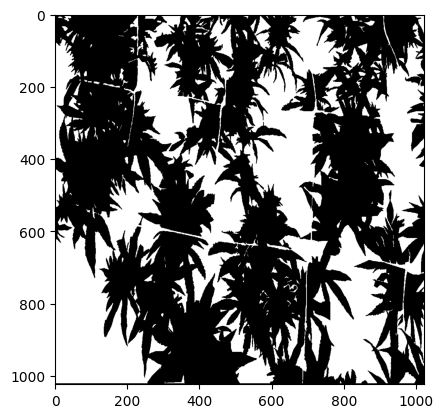

1


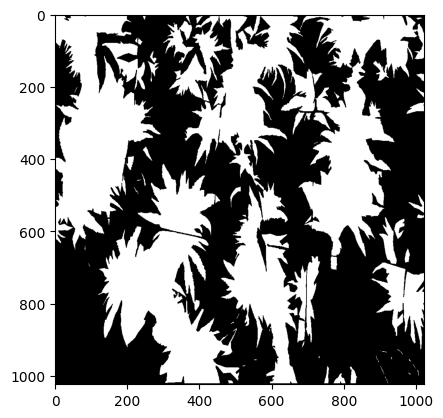

2


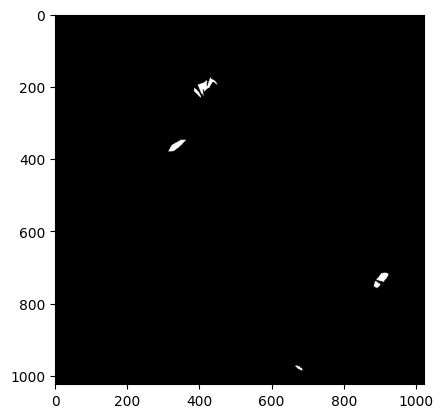

3


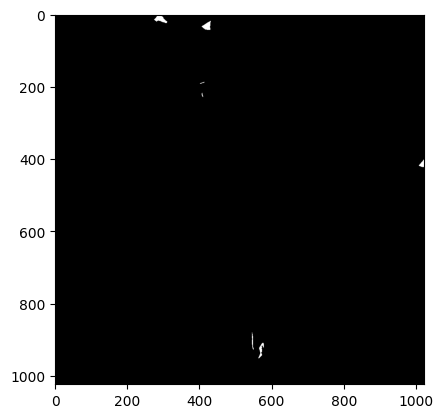

4


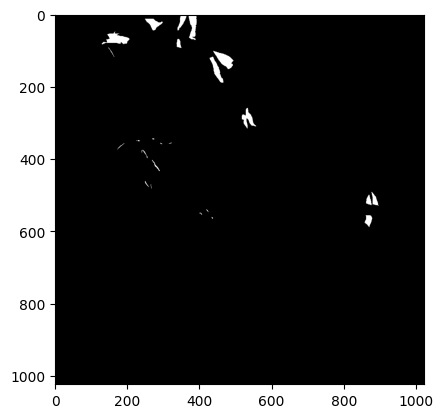

5


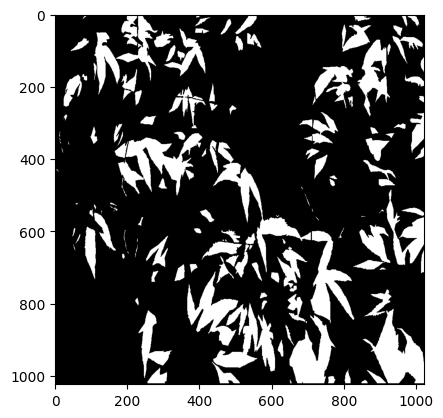

In [31]:

mask = batch_masks[0]

for class_index in range(mask.shape[0]):
    print(class_index)
    mask_channel_np = mask[class_index].numpy()
    plt.imshow(mask_channel_np, cmap='gray')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


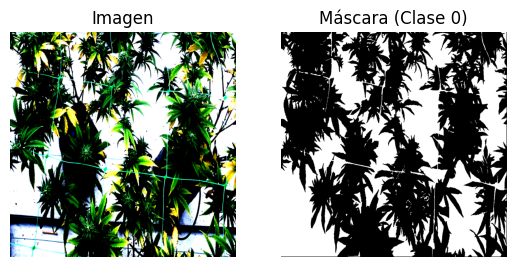

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


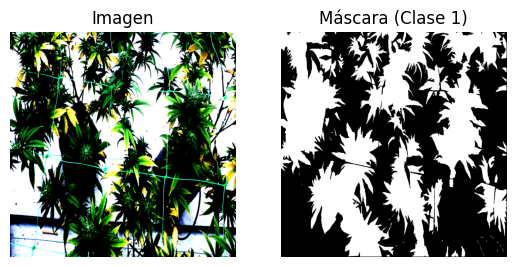

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


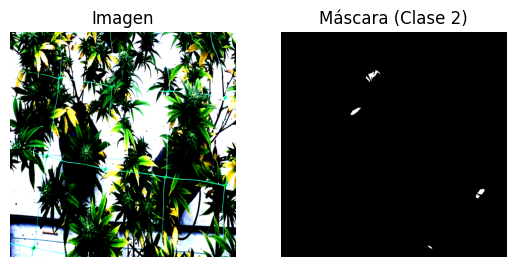

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


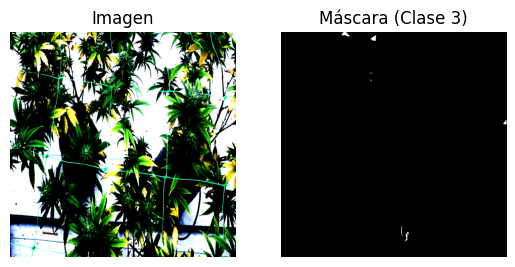

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


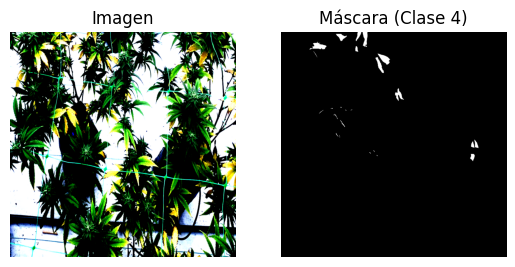

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


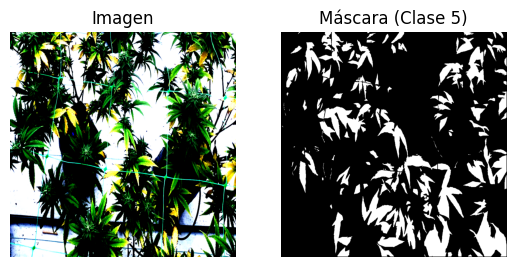

In [32]:
image_toshow = batch_images[0]
mask_toshow = batch_masks[0]

plt.subplot(1, 2, 1)
plt.imshow(image_toshow.permute(1, 2, 0))
plt.axis('off')
plt.title('Imagen')

for class_index in range(mask_toshow.shape[0]):
    
    mask_channel = mask[class_index].numpy()
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_toshow.permute(1, 2, 0))
    plt.axis('off')
    plt.title('Imagen')
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask_channel, cmap='gray')
    plt.axis('off')
    plt.title('Máscara (Clase {})'.format(class_index))

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


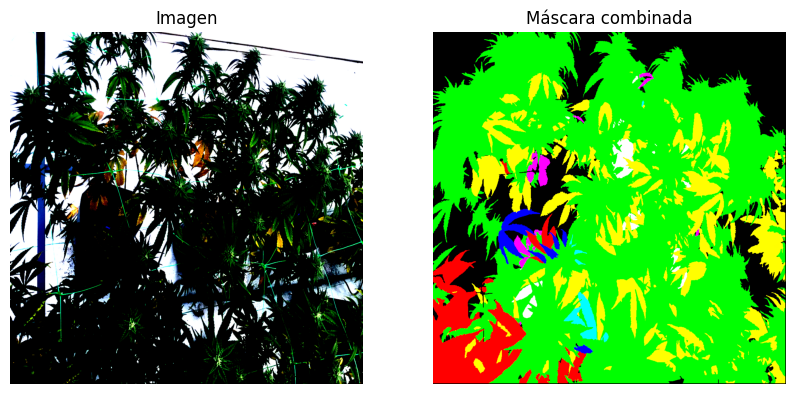

In [28]:
mask = batch_masks[0]

color_map = {
    0: (0, 0, 0),          # Background (Negro)
    1: (0, 255, 0),        # Healthy (verde)
    2: (255, 0, 0),        # Botritis One (rojo)
    3: (0, 0, 255),        # Botritis Two (azul)
    4: (255, 0, 255),     # Botritis Three (amarillo)
    5: (255, 255, 0)       # Defnutrition (magenta)
}

combined_mask = np.zeros((mask.shape[1], mask.shape[2], 3), dtype=np.float64)

for class_index in range(mask.shape[0]):
    mask_channel = mask[class_index].numpy()
    color = color_map[class_index]
    combined_mask += np.expand_dims(mask_channel, axis=2).astype(np.float64) * np.array(color)

combined_mask = np.uint8(np.round(combined_mask))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plotting
ax[0].imshow(batch_images[0].permute(1, 2, 0).numpy())
ax[0].axis('off')
ax[0].set_title('Imagen')

# Full mask plotting
ax[1].imshow(combined_mask)
ax[1].axis('off')
ax[1].set_title('Máscara combinada')
plt.show()

# PLOTTING FROM DATALOADER

In [36]:
image_id = 5
annotations = [annotation for annotation in dataset_view_train['annotations'] if annotation['image_id'] == image_id]

if len(annotations) > 0:
    
    image_info = next((image for image in dataset_view_train['images'] if image['id'] == image_id), None)
    image_path = image_info['file_name']
    image = Image.open(image_path)
    segmentations = [annotation['segmentation'] for annotation in annotations]
    mask = np.zeros((image.height, image.width), dtype=np.uint8)

    for i, segmentation in enumerate(segmentations):
        contour = np.array(segmentation).reshape((-1, 2)).astype(np.int32)
        mask = cv2.drawContours(mask, [contour], -1, (i + 1), thickness=cv2.FILLED)

    colors = [(0, 0, 0)] + [(np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256)) for _ in range(len(segmentations))]
    mask_rgb = np.zeros((image.height, image.width, 3), dtype=np.uint8)

    for i, color in enumerate(colors):
        mask_rgb[mask == i] = color

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Imagen')
    plt.subplot(1, 2, 2)
    plt.imshow(mask_rgb)
    plt.title('Máscara')
    plt.show()
else:
    print("Imagen no encontrada.")




ModuleNotFoundError: No module named 'cv2'

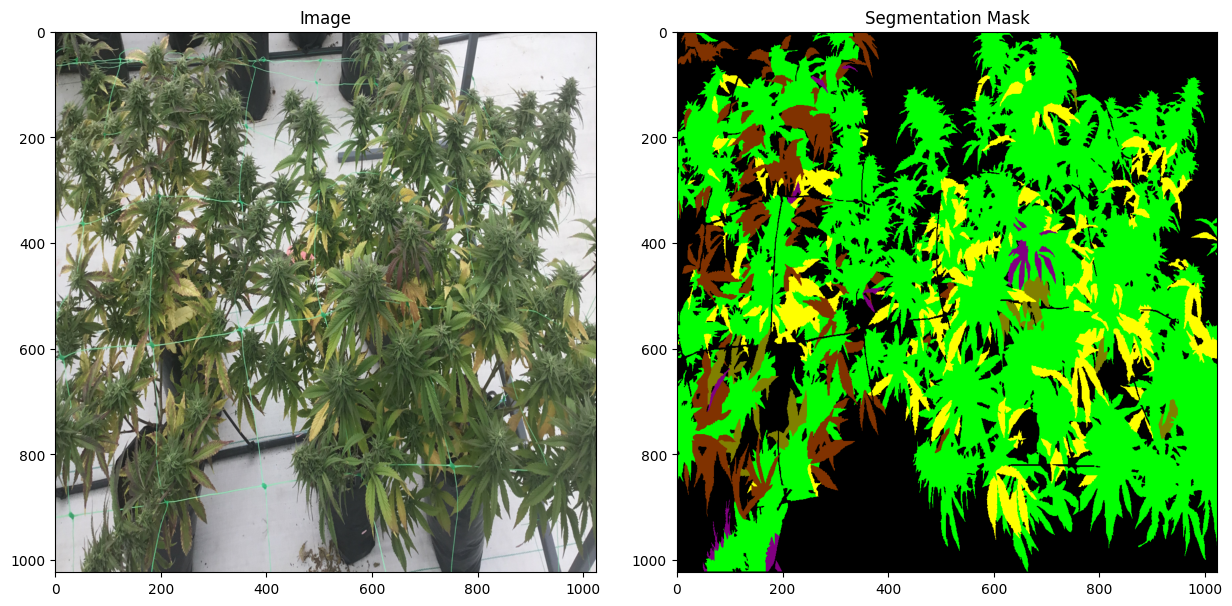

Imagen ID:  0       Objetos de todas las categorias presentes en la imagen.


In [36]:
image_id = 0
annotations = [annotation for annotation in dataset_view_train['annotations'] if annotation['image_id'] == image_id]

if len(annotations) > 0:
    
    image_info = next((image for image in dataset_view_train['images'] if image['id'] == image_id), None)
    image_path = image_info['file_name']
    image = Image.open(image_path)
    segmentations = [annotation['segmentation'] for annotation in annotations]
    category_ids = [annotation['category_id'] for annotation in annotations]
    mask = np.zeros((image.height, image.width), dtype=np.uint8)

    
    for segmentation, category_id in zip(segmentations, category_ids):
        contour = np.array(segmentation).reshape((-1, 2)).astype(np.int32)
        mask = cv2.drawContours(mask, [contour], -1, category_id, thickness=cv2.FILLED)

    category_ids = [0, 1, 2, 3, 4, 5]  # Including Background
    colors = [(0, 0, 0), (0, 255, 0), (128, 50, 0), (128, 0, 128), (128, 128, 0), (255, 255, 0)]  # Example colors
    mask_rgb = np.zeros((image.height, image.width, 3), dtype=np.uint8)

    for category_id, color in zip(category_ids, colors):
        mask_rgb[mask == category_id] = color

    
    fig = plt.figure(figsize=(15, 10))
    plt.subplots_adjust(wspace=0.15)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.subplot(1, 2, 2)
    plt.imshow(mask_rgb)
    plt.title('Segmentation Mask')

    plt.show()

    # Check if there are objects from all categories
    all_categories = set(category_ids)
    missing_categories = set(category_ids) ^ set(all_categories)
    if missing_categories:
        print("Objetos faltantes de las siguientes categorías:")
        for category_id in missing_categories:
            category_name = next((category['name'] for category in dataset_view_train['categories'] if category['id'] == category_id), None)
            print(category_name)
    else:
        print("Imagen ID: ", image_id, "      Objetos de todas las categorias presentes en la imagen.")
else:
    print("Imagen no encontrada.")


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Specify the image ID for visualization
image_id = 19
test_annotations = [annotation for annotation in dataset_view_test['annotations'] if annotation['image_id'] == image_id]

if len(test_annotations) > 0:
    
    image_info = next((image for image in dataset_view_test['images'] if image['id'] == image_id), None)
    image_path = "/content/drive/MyDrive/FromCOCO/DataBase_Final/test/images/" + image_info['file_name']
    image = Image.open(image_path)
    test_segmentations = [annotation['segmentation'] for annotation in test_annotations]
    test_category_ids = [annotation['category_id'] for annotation in test_annotations]
    mask = np.zeros((image.height, image.width), dtype=np.uint8)

    for segmentation, category_id in zip(test_segmentations, test_category_ids):
        contour = np.array(segmentation).reshape((-1, 2)).astype(np.int32)
        mask = cv2.drawContours(mask, [contour], -1, category_id, thickness=cv2.FILLED)

    category_ids = [0, 1, 2, 3, 4, 5]  # Including Background
    colors = [(0, 0, 0), (0, 255, 0), (128, 50, 0), (128, 0, 128), (128, 128, 0), (255, 255, 0)]  # Example colors
    mask_rgb = np.zeros((image.height, image.width, 3), dtype=np.uint8)

    for category_id, color in zip(category_ids, colors):
        mask_rgb[mask == category_id] = color

    fig = plt.figure(figsize=(15, 10))
    plt.subplots_adjust(wspace=0.15)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Test Image')
    plt.subplot(1, 2, 2)
    plt.imshow(mask_rgb)
    plt.title('Test Segmentation Mask')
    plt.show()

    # Check if there are objects from all categories in the test set
    all_categories = set(category_ids)
    missing_categories = set(category_ids) ^ set(all_categories)
    if missing_categories:
        print("Objetos faltantes de las siguientes categorías en el conjunto de pruebas:")
        for category_id in missing_categories:
            category_name = next((category['name'] for category in dataset_view_test['categories'] if category['id'] == category_id), None)
            print(category_name)
    else:
        print("Imagen ID:", image_id, "      Objetos de todas las categorías presentes en la imagen de prueba.")
else:
    print("Imagen no encontrada en el conjunto de pruebas.")


Imagen no encontrada en el conjunto de pruebas.


# MODEL

In [24]:
print("batch_images, masks = batch", "\n")
print("batch_images.shape: ", batch_images.shape, "type batch_images: ", type(batch_images), "batch_images.dtype: ", batch_images.dtype,  "\n")
print("batch_masks.shape: ", batch_masks.shape, "type batch_mask: ", type(batch_masks), "batch_mask.dtype: ", batch_masks.dtype)


batch_images, masks = batch 

batch_images.shape:  torch.Size([1, 3, 1024, 1024]) type batch_images:  <class 'torch.Tensor'> batch_images.dtype:  torch.float32 

batch_masks.shape:  torch.Size([1, 4, 1024, 1024]) type batch_mask:  <class 'torch.Tensor'> batch_mask.dtype:  torch.float32


In [3]:
num_classes = 4
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

class_weights_train = torch.tensor(class_weights_train).to(device)
class_weights_test = torch.tensor(class_weights_test).to(device)

encoder = 'resnet101'
e_weights = 'imagenet'
train_mode = 'RAW'

# PreTrained Model downloaded from SEGMENTATION MODELS PYTORCH Library
model_Unet = smp.Unet(
    encoder_name=f'{encoder}',
    encoder_weights=f'{e_weights}',
    in_channels=3,
    classes=num_classes
)

criterion_ce = nn.CrossEntropyLoss()
criterion_cet = nn.CrossEntropyLoss(weight = class_weights_train, reduce= 'mean')

# Loss Function, Learning Rate and Optimizer
criterion_train = criterion_cet
criterion = criterion_ce
learning_rate = 0.0001
weight_decay = 3.8
optimizer = torch.optim.Adam(model_Unet.parameters(), lr=learning_rate, weight_decay=weight_decay)
model_Unet.to(device)
model_Unet.train()
print(device)

C:\Users\Daniel Cala\AppData\Local\Temp\ipykernel_28728\3919890011.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights_train = torch.tensor(class_weights_train).to(device)
C:\Users\Daniel Cala\AppData\Local\Temp\ipykernel_28728\3919890011.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights_test = torch.tensor(class_weights_test).to(device)
e:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\localrun\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


cuda


In [4]:
device

device(type='cuda')

In [4]:
os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local\Trained Models")
os.getcwd()


'E:\\OneDrive\\Universidad Autónoma de Bucaramanga\\Proyecto de Grado II\\Desarrollo\\Programa Local\\Trained Models'

In [5]:

session = 196
session_folder = f'training_session_{session}'  
os.makedirs(session_folder, exist_ok=True)

# Train loop

num_epochs = 300
checkpoint_interval = num_epochs/2  
prev_iou = None
best_iou = 0.0
saved_epoch = 0
saved_model_path = None
train_losses = []
train_iou = []
test_losses = []
test_iou = []

parameters_tosave = f'Learning Rate: {learning_rate}\n' \
             f'Model: Unet \n' \
             f'Epochs: {num_epochs}\n' \
             f'Encoder: {encoder} \n' \
             f'Encoder Weights: {e_weights} \n' \
             f'Weight Decay: {weight_decay}\n' \
             f'Loss Function: {criterion}\n' \
             f'Class Number: {num_classes}\n' \
             f'Dataset: {dataset_used} \n' \
             f'Training mode: {train_mode} \n' \


parameters_file = os.path.join(session_folder, 'parameters_tosave.txt')


model_Unet_prev_state = None
model_Unet_best_result = None

for epoch in range(num_epochs):
    # Train Mode
    model_Unet.train()
    train_loss = 0.0
    intersection = 0.0
    union = 0.0
    for i, (images, masks) in enumerate(dataloader_train):
        optimizer.zero_grad()
        print(f'Input mask shape: {masks.shape}')
        images = images.to(device)
        masks = masks.squeeze(1).float().to(device)  
        print(f'Postsqueeze mask shape: {masks.shape}')
        outputs = model_Unet(images)
        print(f'Outputs shape: {outputs.shape}')
        loss = criterion(outputs, masks)
        print(f'Loss value: {loss}')
        class_weights = torch.tensor(class_weights_train, dtype=torch.float32, device=device)
        weighted_loss = loss * class_weights
        print(f'Weighted Loss shape: {weighted_loss.shape}')
        train_loss += torch.sum(weighted_loss).item()
        print(f'Train loss item: {train_loss}')
        loss.backward()
        optimizer.step()
        print('\n')

        # Calculate Intersection and Union
        predicted_masks = torch.argmax(outputs, dim=1).float()
        print(f'Predicted Masks shape: {predicted_masks.shape}')
        intersection += torch.sum(predicted_masks * masks).item()
        union += torch.sum((predicted_masks + masks) > 0).item()
        print(f'Train Intersection: {intersection}')
        print(f'Train Union: {union}')

        # Loss
        train_loss += loss.item()
        print(f'Train loss item 2: {train_loss}')
        print(f'Epoch: {epoch+1}/{num_epochs}\t Iteration: {i+1}/{len(dataloader_train)}')

    # Average Loss
    train_loss /= len(dataloader_train.dataset)
    iou_train = intersection / union
    train_losses.append(train_loss)
    train_iou.append(iou_train)

    print(f'Epoch: {epoch+1}/{num_epochs}\t Training Loss: {train_loss}\t IoU: {iou_train}')
    print('\n\n')



    # Evaluation Mode
    model_Unet.eval()
    test_loss = 0.0
    intersection_test = 0
    union_test = 0
    with torch.no_grad():
        for images, masks in dataloader_test:
            print(f'Input test masks shape: {masks.shape}')
            images = images.to(device)
            masks = masks.squeeze(1).float().to(device)
            print(f'Postsqueeze test masks shape: {masks.shape}')
            outputs = model_Unet(images)
            print(f'Test Outputs shape: {outputs.shape}')
            loss = criterion(outputs, masks)
            print(f'Test Loss value: {loss}')
            class_weights = torch.tensor(class_weights_test, dtype=torch.float32, device=device)
            weighted_loss = loss * class_weights
            print(f'Test Weighted Loss shape: {weighted_loss.shape}')
            test_loss += torch.sum(weighted_loss).item()
            print(f'Test loss item: {test_loss}')
            predicted_masks = torch.argmax(outputs, dim=1).float()
            print(f'Predicted Masks shape: {predicted_masks.shape}')
            intersection_test += torch.sum(predicted_masks * masks).item()
            union_test += torch.sum((predicted_masks + masks) > 0).item()
            print(f'Test Intersection: {intersection_test}')
            print(f'Test Union: {union_test}')
            print('\n')

    test_loss /= len(dataloader_test.dataset)
    iou_test = intersection_test / union_test
    test_losses.append(test_loss)
    test_iou.append(iou_test)
    print(f'Test Loss: {test_loss}\t IoU: {iou_test}')
    print(f'Epoch: {epoch+1}/{num_epochs}\t Test Loss: {test_loss}\t IoU: {iou_test}', "\n\n")

    intervalo = (epoch + 1) % checkpoint_interval
    if intervalo == 0:
      print(intervalo)
      checkpoint_path = os.path.join(session_folder, f'model_Unet_checkpoint_epoch_{epoch+1}.pt')
      torch.save(model_Unet.state_dict(), checkpoint_path)
      print(f'Saved model checkpoint at epoch {epoch+1}: {checkpoint_path}')
      print('Parametros: ', 'learnig rate: ', learning_rate, 'Epocas: ', num_epochs)
      print('criterion: ', criterion_cet, 'Optimizador: ', optimizer)
      print(f'Encoder: {encoder}')
      print(f'Sesión: {session}')

    if iou_train > best_iou:
        best_iou = iou_train
        model_Unet_best_result = model_Unet.state_dict()
        saved_epoch = epoch + 1

    if model_Unet_best_result is not None:
        best_model_path = os.path.join(session_folder, 'model_Unet_best.pt')
        torch.save(model_Unet_best_result, best_model_path)
        print(f"Model saved at epoch {saved_epoch} with best IoU: {best_iou}. Path: {best_model_path}")
  
    # Aplicando Early Stopping
    if prev_iou is not None and iou_train == 0: # prev_iou - iou_train > threshold:
        print(f"Sudden drop in IoU detected. Stopping training and saving model from epoch {epoch}.")
        saved_model_path = os.path.join(session_folder, f'model_Unet_checkpoint_epoch_{saved_epoch}.pt')
        torch.save(model_Unet_prev_state, saved_model_path)
        break
    
    if iou_train != 0:
        model_Unet_prev_state = model_Unet.state_dict()
        saved_epoch = saved_epoch +1

    print('IoU Previo', prev_iou)
    prev_iou = iou_train
    print('IoU Actual', iou_train)
    print('\n\n\n\n')


# checar los parámetros del modelo
for name, param in model_Unet.named_parameters():
    if 'dropout' in name:
        print(f"Dropout layer: {name}, Dropout rate: {param.item()}")


if saved_model_path is not None:
    print(f"Model saved at epoch {saved_epoch}: {saved_model_path}")


# Append best IoU to parameters string and save
parameters_tosave += f"Best IoU: {best_iou}\n"

with open(parameters_file, 'w') as file:
    file.write(parameters_tosave)

print(f"Parámetros guardados en: {parameters_file}")

# Plotting Loss and IoU curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_iou, label='Train IoU')
plt.plot(range(1, num_epochs+1), test_iou, label='Test IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('IoU Curve')
plt.legend()
plt.show()

# Save Losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig(os.path.join(session_folder, 'loss_curve.png'))
plt.close()

# Save IoU
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_iou, label='Train IoU')
plt.plot(range(1, num_epochs+1), test_iou, label='Test IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('IoU Curve')
plt.legend()
plt.savefig(os.path.join(session_folder, 'iou_curve.png'))
plt.close()

Conteo por categoría: {0: 72, 1: 6, 2: 10, 3: 71}
Objetos totales: 159


C:\Users\Daniel Cala\AppData\Local\Temp\ipykernel_16952\1328107084.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights = torch.tensor(class_weights_train, dtype=torch.float32, device=device)




Epoch: 1/600	 Iteration: 1/10
Conteo por categoría: {0: 141, 1: 8, 2: 11, 3: 104}
Objetos totales: 264


Epoch: 1/600	 Iteration: 2/10
Conteo por categoría: {0: 44, 1: 3, 2: 0, 3: 65}
Objetos totales: 112


Epoch: 1/600	 Iteration: 3/10
Conteo por categoría: {0: 102, 1: 16, 2: 16, 3: 124}
Objetos totales: 258


Epoch: 1/600	 Iteration: 4/10


KeyboardInterrupt: 

32: [0.01629927, 0.133656, 0.44484855,  0.94456, 0.474887, 0.08930389]

Sesion 9

# INFERENCE

In [2]:
!pip install segmentation-models-pytorch

Clase con la mayor presencia: Botritis Etapa 2
Plantas Sanas: 26.66%
Botritis Etapa 1: 9.41%
Botritis Etapa 2: 31.22%
Botritis Etapa 3: 0.00%
Deficiencias Nutricionales: 0.00%


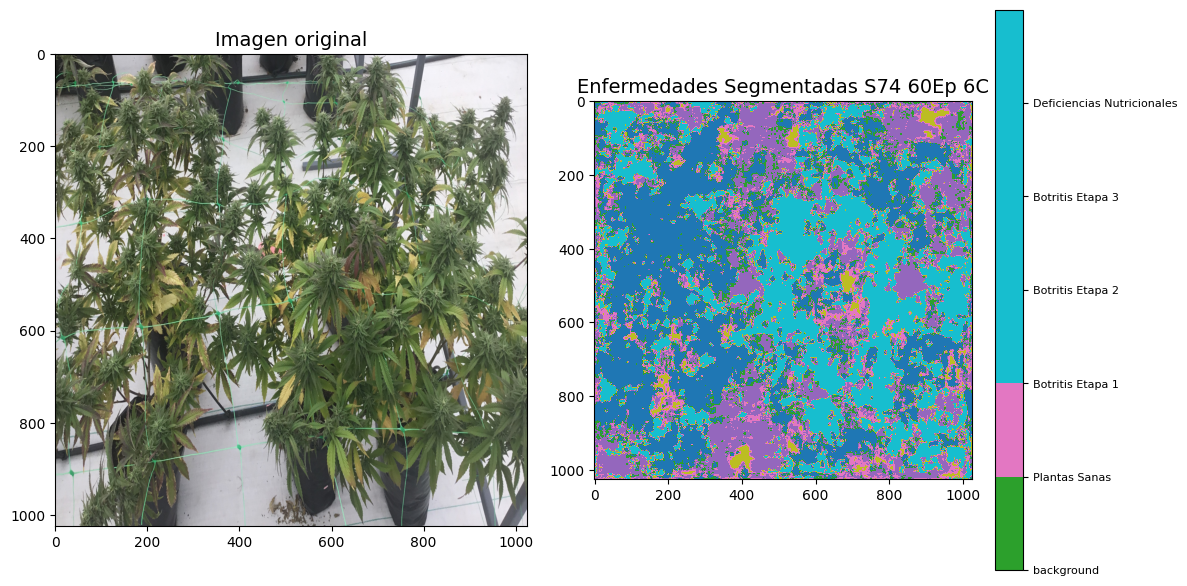

: 

In [9]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import segmentation_models_pytorch as smp
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

os.chdir(r"E:\OneDrive\Universidad Autónoma de Bucaramanga\Proyecto de Grado II\Desarrollo\Programa Local")

num_classes = 6
encoder = 'resnet101'
e_weights = 'imagenet'
model_Unet = smp.Unet(
    encoder_name=f'{encoder}',
    encoder_weights=f'{e_weights}',
    in_channels=3,
    classes=num_classes
)

model_path = r'Trained Models\training_session_49\model_Unet_checkpoint_epoch_120.pt'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_Unet.load_state_dict(torch.load(model_path, map_location=device))
model_Unet.eval()

# Image Preprocessing
image_path = r'Images for Inference\20220921_162407987_iOS.jpg'
image = Image.open(image_path).convert('RGB')
image = image.resize((1024, 1024))
image_original = image
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_image = preprocess(image).unsqueeze(0)


# Prediction
with torch.no_grad():
    output = model_Unet(input_image)
predicted_masks = torch.argmax(output, dim=1)
input_image_np = input_image.squeeze(0).permute(1, 2, 0).numpy()
predicted_masks_np = predicted_masks.squeeze(0).numpy()

# Category Mapping
class_names_f = ["background", "Plantas Sanas", "Botritis Etapa 1", "Botritis Etapa 2", "Botritis Etapa 3", "Deficiencias Nutricionales"]


unique_values = np.unique(predicted_masks_np)
predicted_categories = [class_names_f[value] for value in unique_values]
class_pixels = {class_name: np.sum(predicted_masks_np == class_id) for class_id, class_name in enumerate(class_names_f)}
total_pixels = np.sum(list(class_pixels.values()))
class_percentages = {class_name: pixels / total_pixels * 100 for class_name, pixels in class_pixels.items()}



# Most Representated class
largest_class = max(class_percentages, key=class_percentages.get)
if largest_class == 'background':
    del class_percentages[largest_class]
    largest_class = max(class_percentages, key=class_percentages.get)
print("Clase con la mayor presencia:", largest_class)

# Classes Percentages
for class_name, percentage in class_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")


# Plotting Predictions
cmap = plt.get_cmap('tab10', len(class_names_f))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_original)
axes[0].set_title("Imagen original")
axes[1].imshow(predicted_masks_np, cmap=cmap)
axes[1].set_title(f'Enfermedades Segmentadas Sesion 60Ep 6C')
axes[1].set_aspect('equal') 
axes[0].title.set_fontsize(14)
axes[1].title.set_fontsize(14)
im = axes[1].imshow(predicted_masks_np, cmap=cmap)
cbar = plt.colorbar(im, ax=axes[1], ticks=np.arange(len(class_names_f)), boundaries=np.arange(len(class_names_f) + 1))
cbar.set_ticklabels(class_names_f)
cbar.ax.tick_params(labelsize=8)
plt.tight_layout()
plt.show()    

https://www.riverbankcomputing.com/static/Docs/PyQt5/
https://misovirtual.virtual.uniandes.edu.co/codelabs/interfaces-graficas-pyqt5/index.html?index=..%2F..index#0
https://www.youtube.com/watch?v=sAebf7AL_eQ
https://unipython.com/pyqt5-interfaces-graficas-con-python/
https://build-system.fman.io/pyqt5-tutorial

## FIN DEL ENTRENAMIENTO

##  PYTORCH

https://colab.research.google.com/github/sachinruk/blog/blob/master/_notebooks/2021-08-21-coco-semantic-segmentation-data.ipynb#scrollTo=Jr4iFYp155HV